# Bone Marrow Transplant

**About the dataset**

The data set describes pediatric patients with several hematologic diseases: malignant disorders (i.a. acute lymphoblastic leukemia, acute myelogenous leukemia, chronic myelogenous leukemia, myelodysplastic syndrome) and nonmalignant cases (i.a. severe aplastic anemia, Fanconi anemia, with X-linked adrenoleukodystrophy). All patients were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.

**Motivation**

The motivation of the study was to identify the most important factors influencing the success or failure of the transplantation procedure. 

*In particular, the aim was to verify the hypothesis that increased dosage of CD34+ cells / kg extends overall survival time without simultaneous occurrence of undesirable events affecting patients' quality of life (KawÅ‚ak et al., 2010).*

The data set has been used in our work concerning survival rules (WrÃ³bel et al., 2017) and user-guided rule induction (Sikora et al., 2019). The authors of the research on stem cell transplantation (KawÅ‚ak et al., 2010) who inspired our study also contributed to the set.

In [2]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mplcyberpunk
plt.style.use('cyberpunk')

# Loading Data

In [3]:
data = arff.loadarff('/Users/rudra_sarkar/Downloads/bone-marrow.arff')
df = pd.DataFrame(data[0])
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


In [4]:
df.describe()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,182.000000,182.000000,185.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,33.472068,9.931551,11.891781,5.385096,4.745714,35.801081,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,8.271826,5.305639,9.914386,9.598716,3.859128,19.650922,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,18.646575,0.600000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,27.039726,5.050000,5.350000,1.786683,1.687500,19.000000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,33.550685,9.600000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,40.117809,14.050000,15.415000,5.823565,6.785000,50.600000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,55.553425,20.200000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


# Preprocessing Helper Functions

In [5]:
def find_categorical_features(data : pd.DataFrame):
    """
    This function returns a list of all the categorical attributes
    present in the dataframe
    
    """
    categorical_features = []
    for i in range(len(data.columns)):
        if data.dtypes[i] == 'object':
            categorical_features.append(data.columns[i])
    return categorical_features

cat_features = find_categorical_features(df)
print(f"Categorical Features\n{cat_features}")

Categorical Features
['Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV', 'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup', 'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen', 'Alel', 'HLAgrI', 'Recipientage10', 'Recipientageint', 'Relapse', 'aGvHDIIIIV', 'extcGvHD']


In [6]:
def find_numerical_features(data : pd.DataFrame):
    """
    This function return a list of all the 
    numerical attributes of the dataframe
    
    """
    numerical_features = []
    for i in range(len(data.columns)):
        if data.dtypes[i] == 'int64' or data.dtypes[i] == 'float64':
            numerical_features.append(data.columns[i])
    return numerical_features

num_features = find_numerical_features(df)
print(f"Numerical features\n{num_features}")

Numerical features
['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time', 'survival_status']


([<matplotlib.patches.Wedge at 0x13f52f5e0>,
 [Text(0.6540964894588662, 0.8843968467139555, 'numerical'),
  Text(-0.6540964894588663, -0.8843968467139554, 'categorical')],
 [Text(0.3567799033411997, 0.4823982800257938, '29.7%'),
  Text(-0.35677990334119974, -0.48239828002579377, '70.3%')])

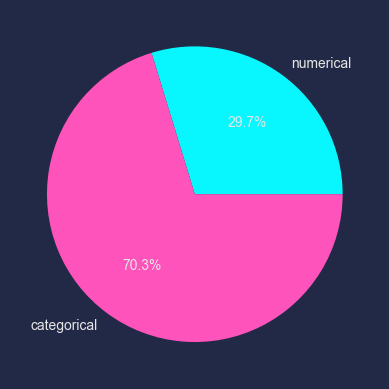

In [7]:
plt.pie([len(num_features), len(cat_features)], labels=["numerical", "categorical"], autopct = "%1.1f%%")

In [8]:
def find_unique_values(data : pd.DataFrame, categorical_features : list):
    """
    This function returns a dictionary where
    keys : categorical attributes
    values : the unique classes of the corresponding classes
    
    """
    unique_values = {}
    for i in categorical_features:
        unique_values[i] = data[i].unique()
    return unique_values

cat_unique_values = find_unique_values(df, cat_features)
print("Categorical features and their classes")
for feature in cat_features:
    print(f"{feature} : {cat_unique_values[feature]}")

Categorical features and their classes
Recipientgender : [b'1' b'0']
Stemcellsource : [b'1' b'0']
Donorage35 : [b'0' b'1']
IIIV : [b'1' b'0']
Gendermatch : [b'0' b'1']
DonorABO : [b'1' b'-1' b'2' b'0']
RecipientABO : [b'1' b'-1' b'2' b'0' b'?']
RecipientRh : [b'1' b'0' b'?']
ABOmatch : [b'0' b'1' b'?']
CMVstatus : [b'3' b'0' b'2' b'1' b'?']
DonorCMV : [b'1' b'0' b'?']
RecipientCMV : [b'1' b'0' b'?']
Disease : [b'ALL' b'AML' b'chronic' b'nonmalignant' b'lymphoma']
Riskgroup : [b'1' b'0']
Txpostrelapse : [b'0' b'1']
Diseasegroup : [b'1' b'0']
HLAmatch : [b'0' b'1' b'3' b'2']
HLAmismatch : [b'0' b'1']
Antigen : [b'-1' b'1' b'0' b'2' b'?']
Alel : [b'-1' b'0' b'2' b'1' b'3' b'?']
HLAgrI : [b'0' b'1' b'7' b'3' b'2' b'4' b'5']
Recipientage10 : [b'0' b'1']
Recipientageint : [b'1' b'0' b'2']
Relapse : [b'0' b'1']
aGvHDIIIIV : [b'0' b'1']
extcGvHD : [b'1' b'?' b'0']


In [9]:
def check_null_values(data : pd.DataFrame):
    """
    if there are null values then the function
    returns a dictionary where 
    keys : attributes
    values : number of missing values for that 
    corresponding attribute
    else it will just return 0
    
    """
    null_values = {}
    for i in data.columns:
        if data[i].isna().sum()>0:
            null_values[i] = data[i].isna().sum()
    if len(null_values)==0:
        return 0
    return null_values
    
null_val = check_null_values(df)
print(f"Number of attributes having missing values in the dataset : {len(null_val)}")
for val in null_val:
    print(f"Number of null values in {val} : {null_val[val]}")

Number of attributes having missing values in the dataset : 3
Number of null values in CD3dCD34 : 5
Number of null values in CD3dkgx10d8 : 5
Number of null values in Rbodymass : 2


In [10]:
def fill_null_values(data:pd.DataFrame, null_values:dict):
    """
    return a dataframe where all the null values 
    have been treated
    general imputation procedure : 
    1) for object type : replace by mode
    2) for numerical i.e for int / float type : replace by mean
    
    """
    data = data.copy()
    for i in null_values:
        if data.dtypes[i] == 'object':
            data[i].fillna(data[i].mode(), inplace=True)
        elif data.dtypes[i] == 'float64' or data.dtypes[i] == 'int64':
            data[i].fillna(data[i].mean(), inplace=True)
    return data

new_df = fill_null_values(df, null_val)
new_null = check_null_values(new_df)

print(f"Number of null values after missing value treatment : {new_null}")

Number of null values after missing value treatment : 0


In [11]:
def check_bquestion_values(data:pd.DataFrame, categories:list):
    """
    This function replaces all the 'b?' type entries with
    the mode of that particular categorical attribute 

    """
    data = data.copy()
    for i in categories:
        data[i].replace(b'?', data[i].mode()[0], inplace=True)
    return data

new_df = check_bquestion_values(new_df, cat_features)

In [12]:
def label_encode_dFrame(data: pd.DataFrame, categories:list):
    """
    This function returns a dataframe with all the
    categorical attributes label encoded

    """
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for i in categories:
        data[i] = le.fit_transform(data[i])
    return data
labelled_df = label_encode_dFrame(new_df, cat_features)
labelled_df.head(4)

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,2,2,1,0,...,1,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,1,0,23.342466,0,1,0,0,0,1,0,...,1,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,1,0,26.394521,0,1,0,0,0,1,0,...,1,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,0,0,39.684932,1,1,0,2,3,1,1,...,1,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0


<Axes: title={'center': 'mean of the numerical features'}>

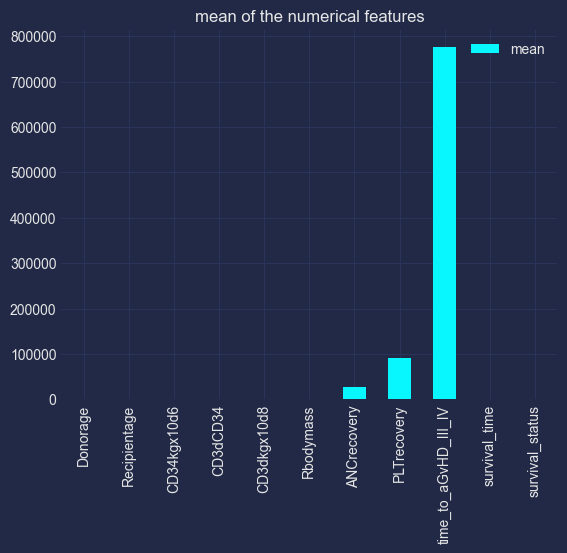

In [13]:
def find_mean_numerical(data:pd.DataFrame, num_features:list):
    """
    returns a dictionary where
    keys : numerical attributes
    values : mean of the corresponding numerical features

    """
    mean_list = {}
    for i in num_features:
        mean_list[i] = data[i].mean()
    return mean_list

mean_list = find_mean_numerical(labelled_df, num_features)
# print("Mean values")
# for feature in mean_list:
#     print(f"Mean of the attribute {feature} is {mean_list[feature]}")
pd.DataFrame(mean_list.values(),index = mean_list.keys(), columns=["mean"]).plot(kind = 'bar', title = 'mean of the numerical features')

In [14]:
def find_mode_categorical(data:pd.DataFrame, categories:list):
    """
    returns a dictionary where
    keys : attribute
    values : the most frequent class of the particular attribute

    """
    mode_list = {}
    for i in categories:
        mode_list[i] = data[i].mode()[0]
    return mode_list

mode_list = find_mode_categorical(df, cat_features)
print("Modes")
for i,feature in enumerate(mode_list):
    if i%4 == 0:
        print()
    print(f"{feature} : {mode_list[feature]}", end = " | ")

Modes

Recipientgender : b'1' | Stemcellsource : b'1' | Donorage35 : b'0' | IIIV : b'1' | 
Gendermatch : b'0' | DonorABO : b'0' | RecipientABO : b'1' | RecipientRh : b'1' | 
ABOmatch : b'1' | CMVstatus : b'2' | DonorCMV : b'0' | RecipientCMV : b'1' | 
Disease : b'ALL' | Riskgroup : b'0' | Txpostrelapse : b'0' | Diseasegroup : b'1' | 
HLAmatch : b'0' | HLAmismatch : b'0' | Antigen : b'-1' | Alel : b'-1' | 
HLAgrI : b'0' | Recipientage10 : b'0' | Recipientageint : b'2' | Relapse : b'0' | 
aGvHDIIIIV : b'1' | extcGvHD : b'1' | 

<Axes: >

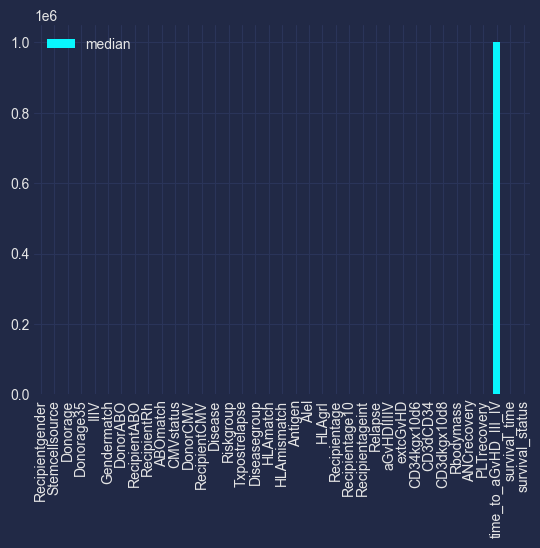

In [15]:
def find_median(data:pd.DataFrame):
    """
    returns a dictionary where
    keys : attributes
    value : median of the particular attribute

    """
    median_list = {}
    for i in data.columns:
        median_list[i] = data[i].median()
    return median_list

median_list = find_median(labelled_df)
# print("Median values")
# for feature in median_list:
#     print(f"Median of the attribute {feature} is {median_list[feature]}")

pd.DataFrame(median_list.values(), index = median_list.keys(), columns = ["median"]).plot(kind = 'bar')

<Axes: >

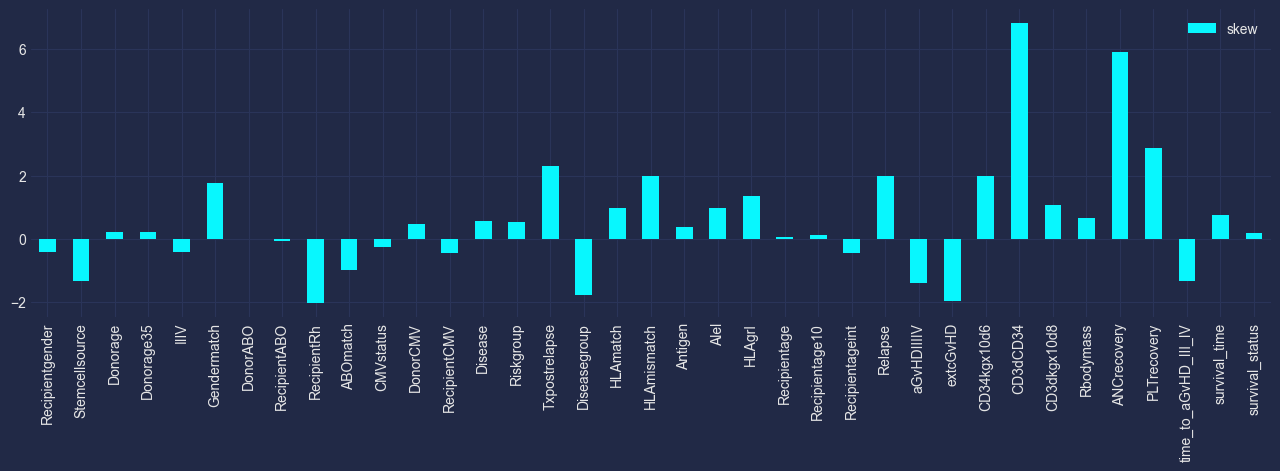

In [16]:
def find_skew(data:pd.DataFrame):
    """
    returns a dictionary where
    key : attribute
    value : skew of the attribute

    """
    skew_list = {}
    for i in data.columns:
        skew_list[i] = data[i].skew()
    return skew_list

skew_list = find_skew(labelled_df)
# print("Skewness")
# for feature in skew_list:
#     print(f"Skewness of the attribute {feature} is {skew_list[feature]}")
pd.DataFrame(skew_list.values(), index = skew_list.keys(), columns = ["skew"]).plot(kind = 'bar', figsize = (16,4))

<Axes: >

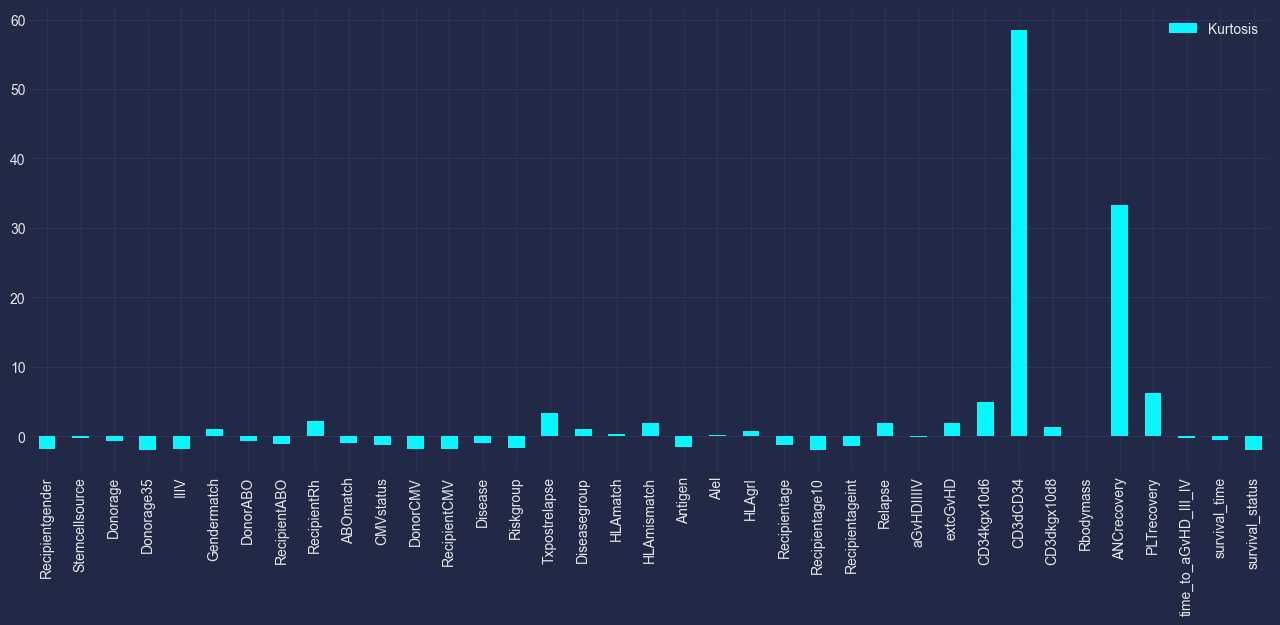

In [17]:
def find_kurtosis(data:pd.DataFrame):
    """
    returns a dictionary where 
    key : attribute 
    value : kurtosis of the attribute

    """
    kurtosis_list = {}
    for i in data.columns:
        kurtosis_list[i] = data[i].kurtosis()
    return kurtosis_list

kurt_list = find_kurtosis(labelled_df)
# print("Kurtosis values")
# for feature in kurt_list:
#     print(f"Kurtosis of the attribute {feature} is {kurt_list[feature]}")
pd.DataFrame(kurt_list.values(), index = kurt_list.keys(), columns = ["Kurtosis"]).plot(kind = 'bar', figsize = (16, 6))

## First Preprocessing

In the first preprocessing we are concerned mainly with 2 tasks
- Checking the null values
- Imputation of the null values

In [18]:
categorical_features = find_categorical_features(df)
numerical_features = find_numerical_features(df)
categorical_features_unique = find_unique_values(df, categorical_features)
null_values = check_null_values(df)


In [19]:
new_df = fill_null_values(df, null_values)
new_categorical_features = find_categorical_features(new_df)
new_numerical_features = find_numerical_features(new_df)
new_categorical_features_unique = find_unique_values(new_df, new_categorical_features)

In [20]:
new_df.head(4)

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0


## Second Preprocessing

In most of the categorical attributes, instead of nan values the dataset is filled with a string which starts with this particular character b'?'. So in the second preprocessing our task is to locate those values and perform imputation

In [21]:
processed_df = check_bquestion_values(new_df, new_categorical_features)
processed_categorical_features = find_categorical_features(processed_df)
processed_numerical_features = find_numerical_features(processed_df)
processed_categorical_features_unique = find_unique_values(processed_df, processed_categorical_features)

In [22]:
processed_df.head(4)

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'1',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0


## Third Preprocessing

In the third preprocessing we will just label encode all the classes of the categorical attributes of the dataframe

In [23]:
encoded_df = label_encode_dFrame(processed_df, processed_categorical_features)
encoded_categorical_features = find_categorical_features(encoded_df)
encoded_numerical_features = find_numerical_features(encoded_df)
encoded_categorical_features_unique = find_unique_values(encoded_df, encoded_categorical_features)

In [24]:
encoded_df.head(4)

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,2,2,1,0,...,1,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,1,0,23.342466,0,1,0,0,0,1,0,...,1,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,1,0,26.394521,0,1,0,0,0,1,0,...,1,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,0,0,39.684932,1,1,0,2,3,1,1,...,1,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0


In [25]:
# Normalizing the dataframe
encoded_df = encoded_df / encoded_df.max()

Text(0.5, 0.98, 'Visualising features after normalizing')

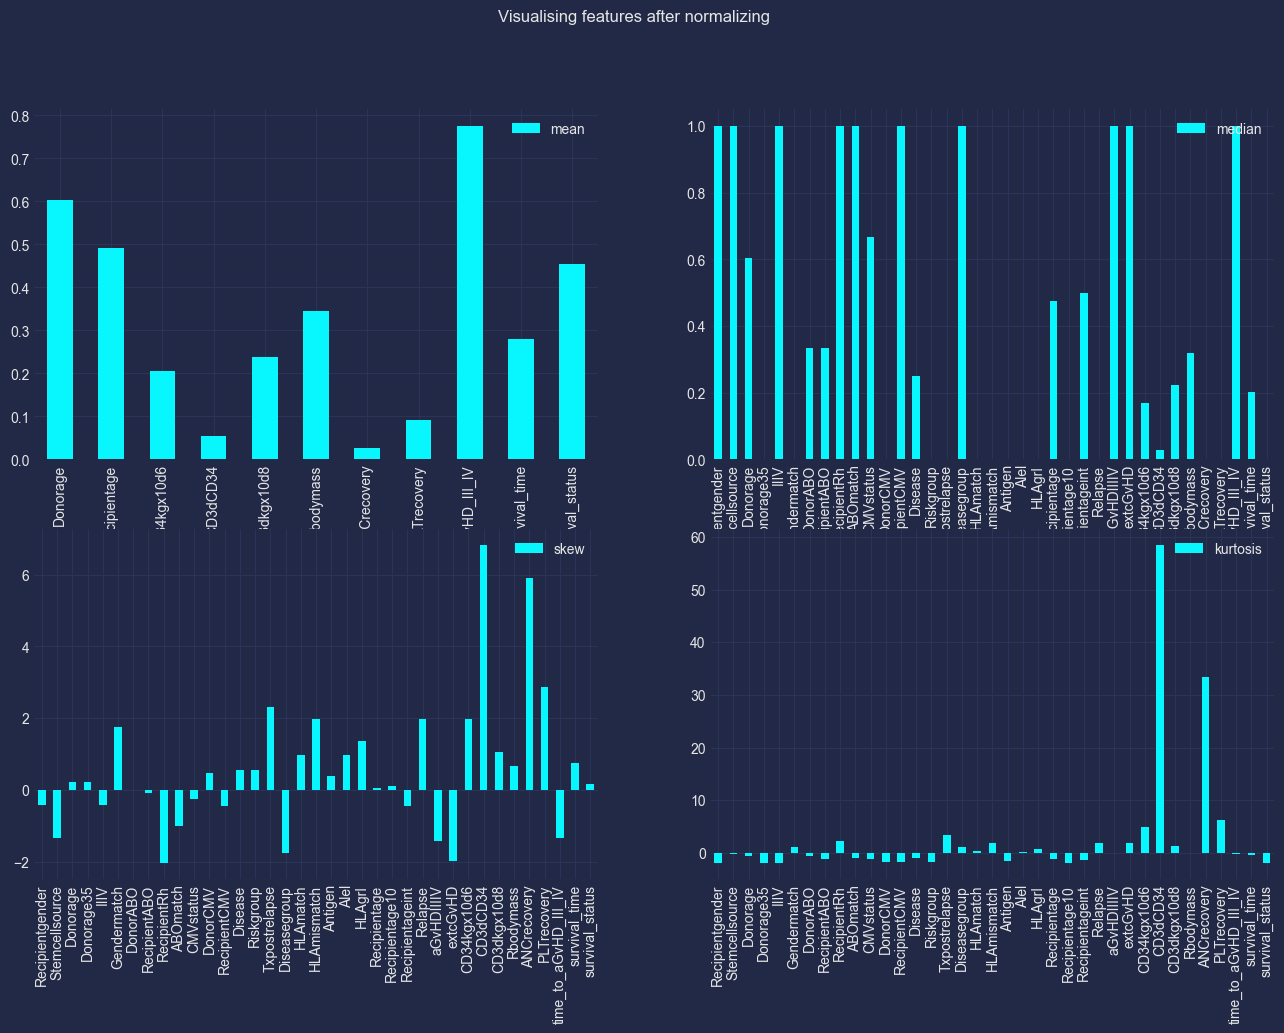

In [26]:
mean_edf = find_mean_numerical(encoded_df, numerical_features)
median_edf = find_median(encoded_df)
skew_edf = find_skew(encoded_df)
kurt_edf = find_kurtosis(encoded_df)
temp = [(mean_edf, "mean"), (median_edf, "median"), (skew_edf, "skew"), (kurt_edf, "kurtosis")]

fig, ax = plt.subplots(2,2, figsize = (16,10))
for i,j in enumerate(temp):
    pd.DataFrame(j[0].values(), index = j[0].keys(), columns = [j[1]]).plot(kind = 'bar', ax = ax[(i+1)//3,i%2])
fig.suptitle("Visualising features after normalizing")

## Visualizing distribution of numerical features

Text(0.5, 0.98, 'Density plots of the numerical attributes')

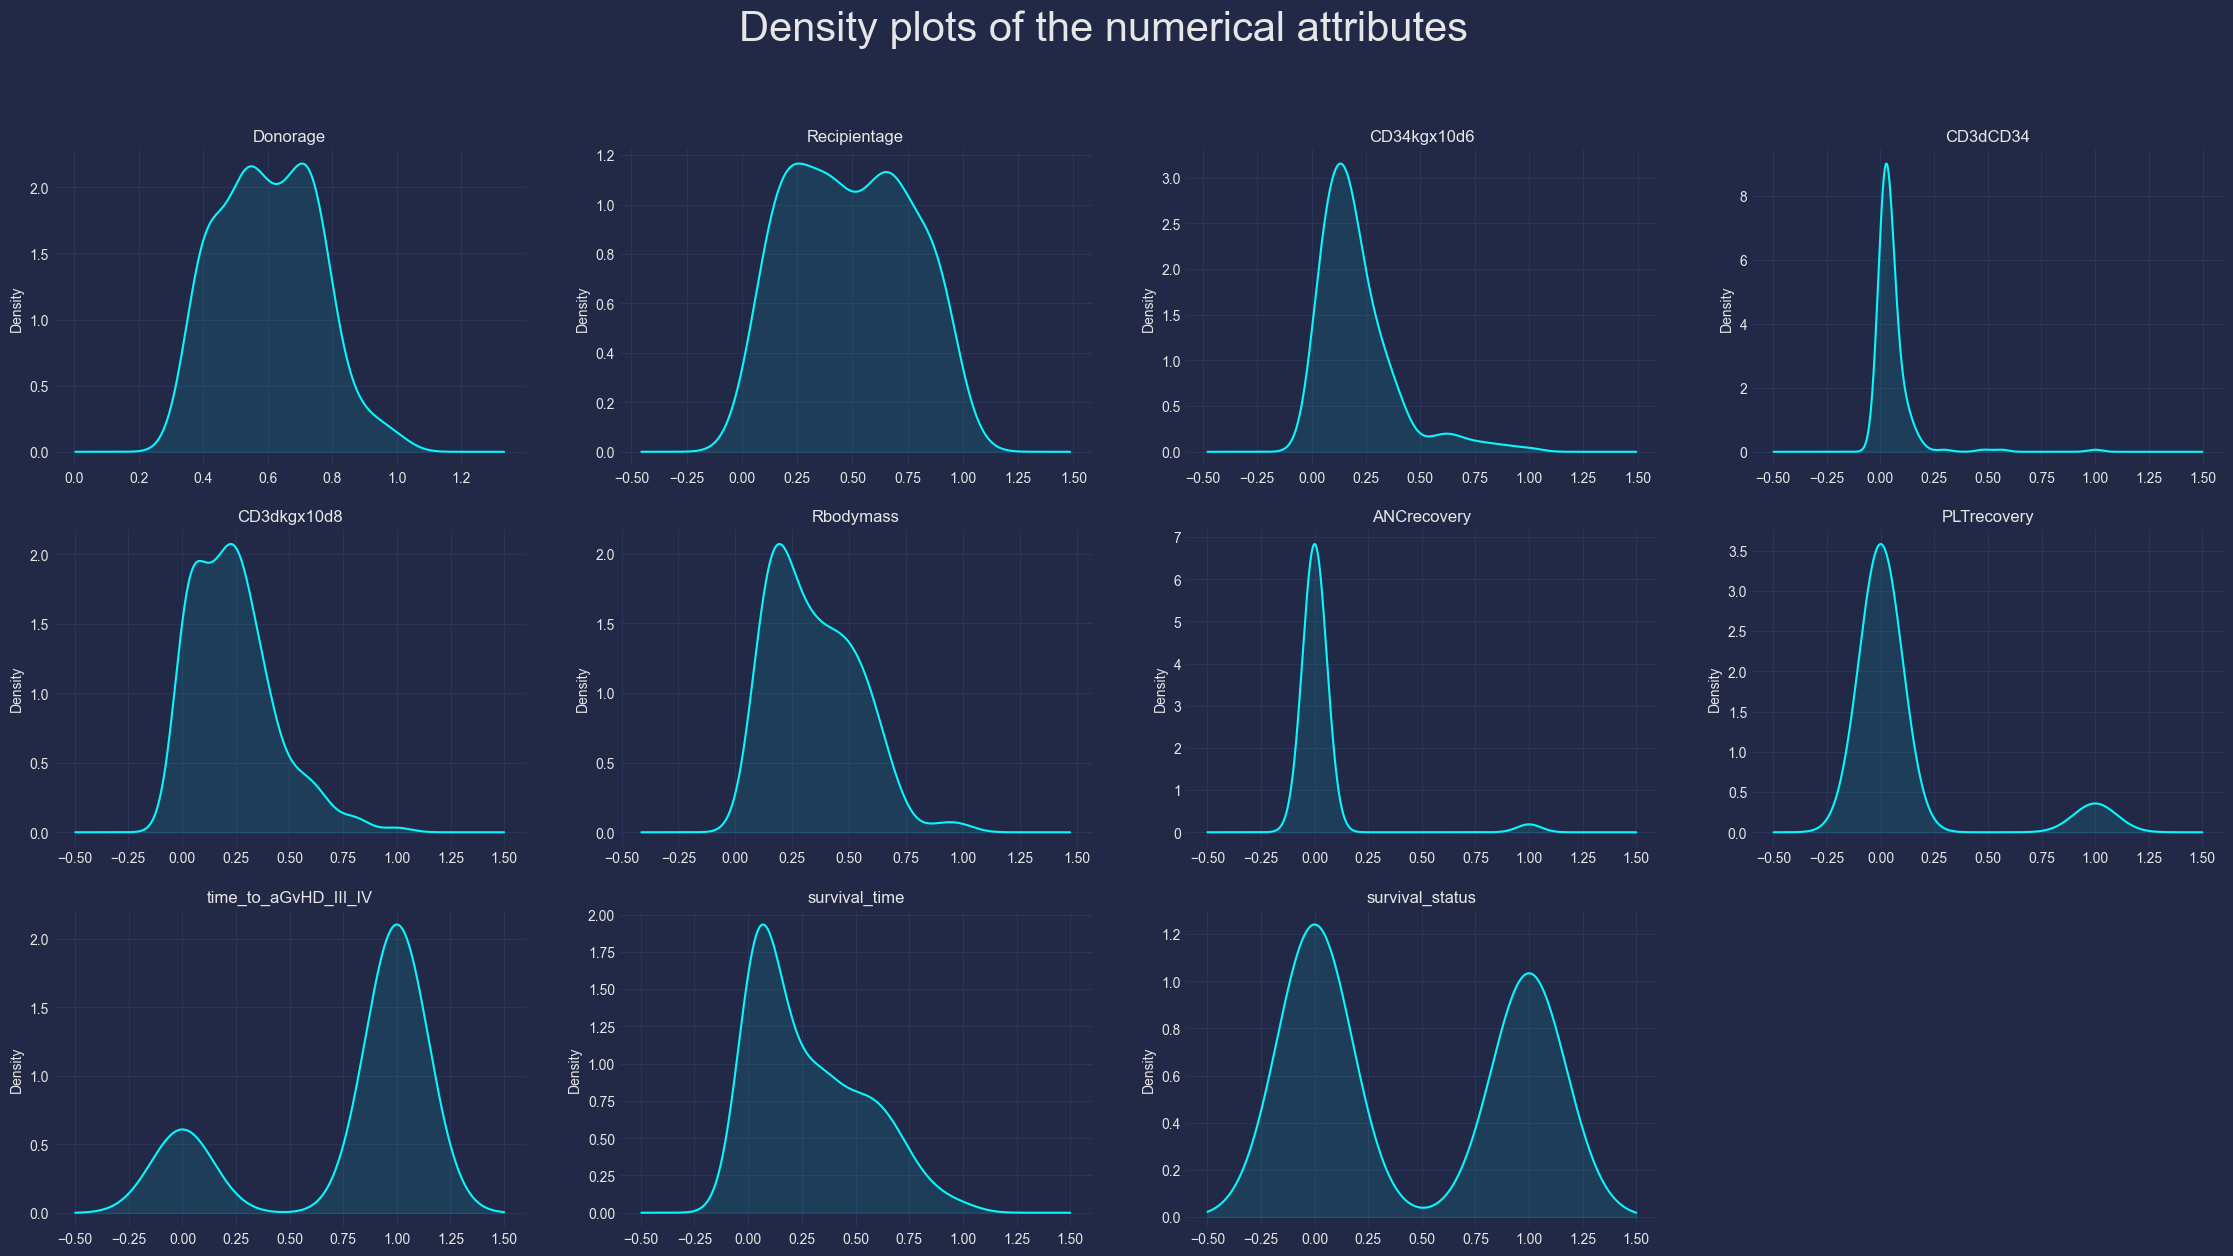

In [27]:
fig, ax = plt.subplots(3,4, figsize=(28,14), squeeze=True)
fig.delaxes(ax[2,3])
k = 0
for i in range(3):
    for j in range(4):
        if k >= 11:
            break
        else:
            encoded_df[numerical_features[k]].plot(kind='density', ax = ax[i,j], title = numerical_features[k])
            k += 1
            mplcyberpunk.add_underglow(ax=ax[i,j])
fig.suptitle("Density plots of the numerical attributes", fontsize = 30)

From the density plots we can infer that most of the attributes are not normally distributed and there are some bimodal and skewed distributions

## Visualizing the of numerical features with Box plots

Text(0.5, 0.98, 'Box plots of the numerical attributes')

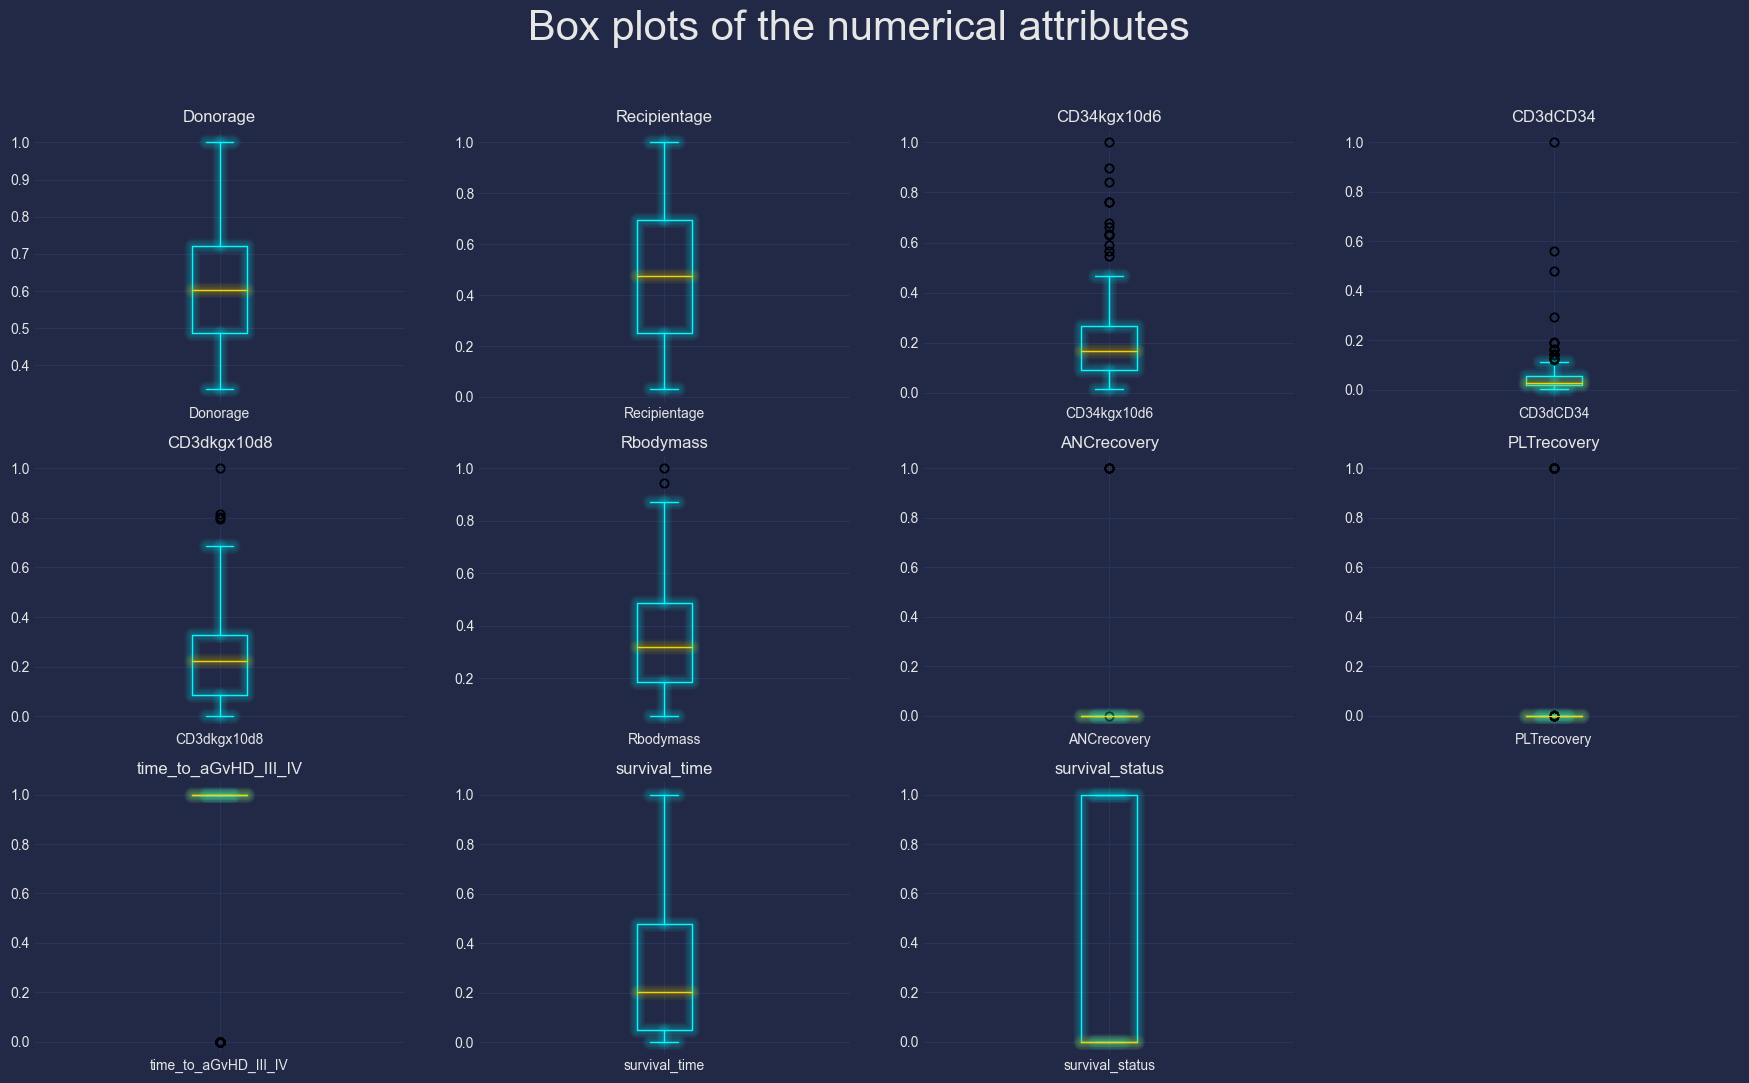

In [28]:
fig, ax = plt.subplots(3,4, figsize=(22,12), squeeze=True)
fig.delaxes(ax[2,3])
k = 0
for i in range(3):
    for j in range(4):
        if k >= 11:
            break
        else:
            encoded_df[numerical_features[k]].plot(kind='box', ax = ax[i,j], title = numerical_features[k])
            k += 1
            mplcyberpunk.make_lines_glow(ax=ax[i,j])

fig.suptitle("Box plots of the numerical attributes", fontsize = 30)

From the boxplots, we can observe that the features "ANC recovery", "PLT recovery", "Cd3dkgx10d8", "CD34kg", "CD3dcd34" are highly skewed

## Inferences from numerical features

- The feature "Donorage" is approximately normally distributed, with a mean around 0.6 
- The feature "Recipent age" is also approximately normally distributed with a mean around 0.5
- The feature "CD34kgx10d6" , "CD3dCD34", "CD3dkgx10d8" has high number of outliers 
- There are some anomalies observed in the features "ANCrecovery", "PLTrecovery", "time_to_aGvHD_III_IV"
- The feature "survival status" is bimodal and is imbalanced by the presence of more negative status 

In [29]:
encoded_df['survival_status'].value_counts()

0.0    102
1.0     85
Name: survival_status, dtype: int64

In [30]:
from sklearn.utils import shuffle
sampled_positive = encoded_df.where(encoded_df['survival_status'] == 1.0).dropna().sample(n = 17)
balanced_df = pd.concat([encoded_df, sampled_positive])
balanced_df = shuffle(balanced_df)

balanced_df['survival_status'].value_counts()

0.0    102
1.0    102
Name: survival_status, dtype: int64

## Plotting histograms of categorical features

Text(0.5, 0.98, 'Histogram of categorical features')

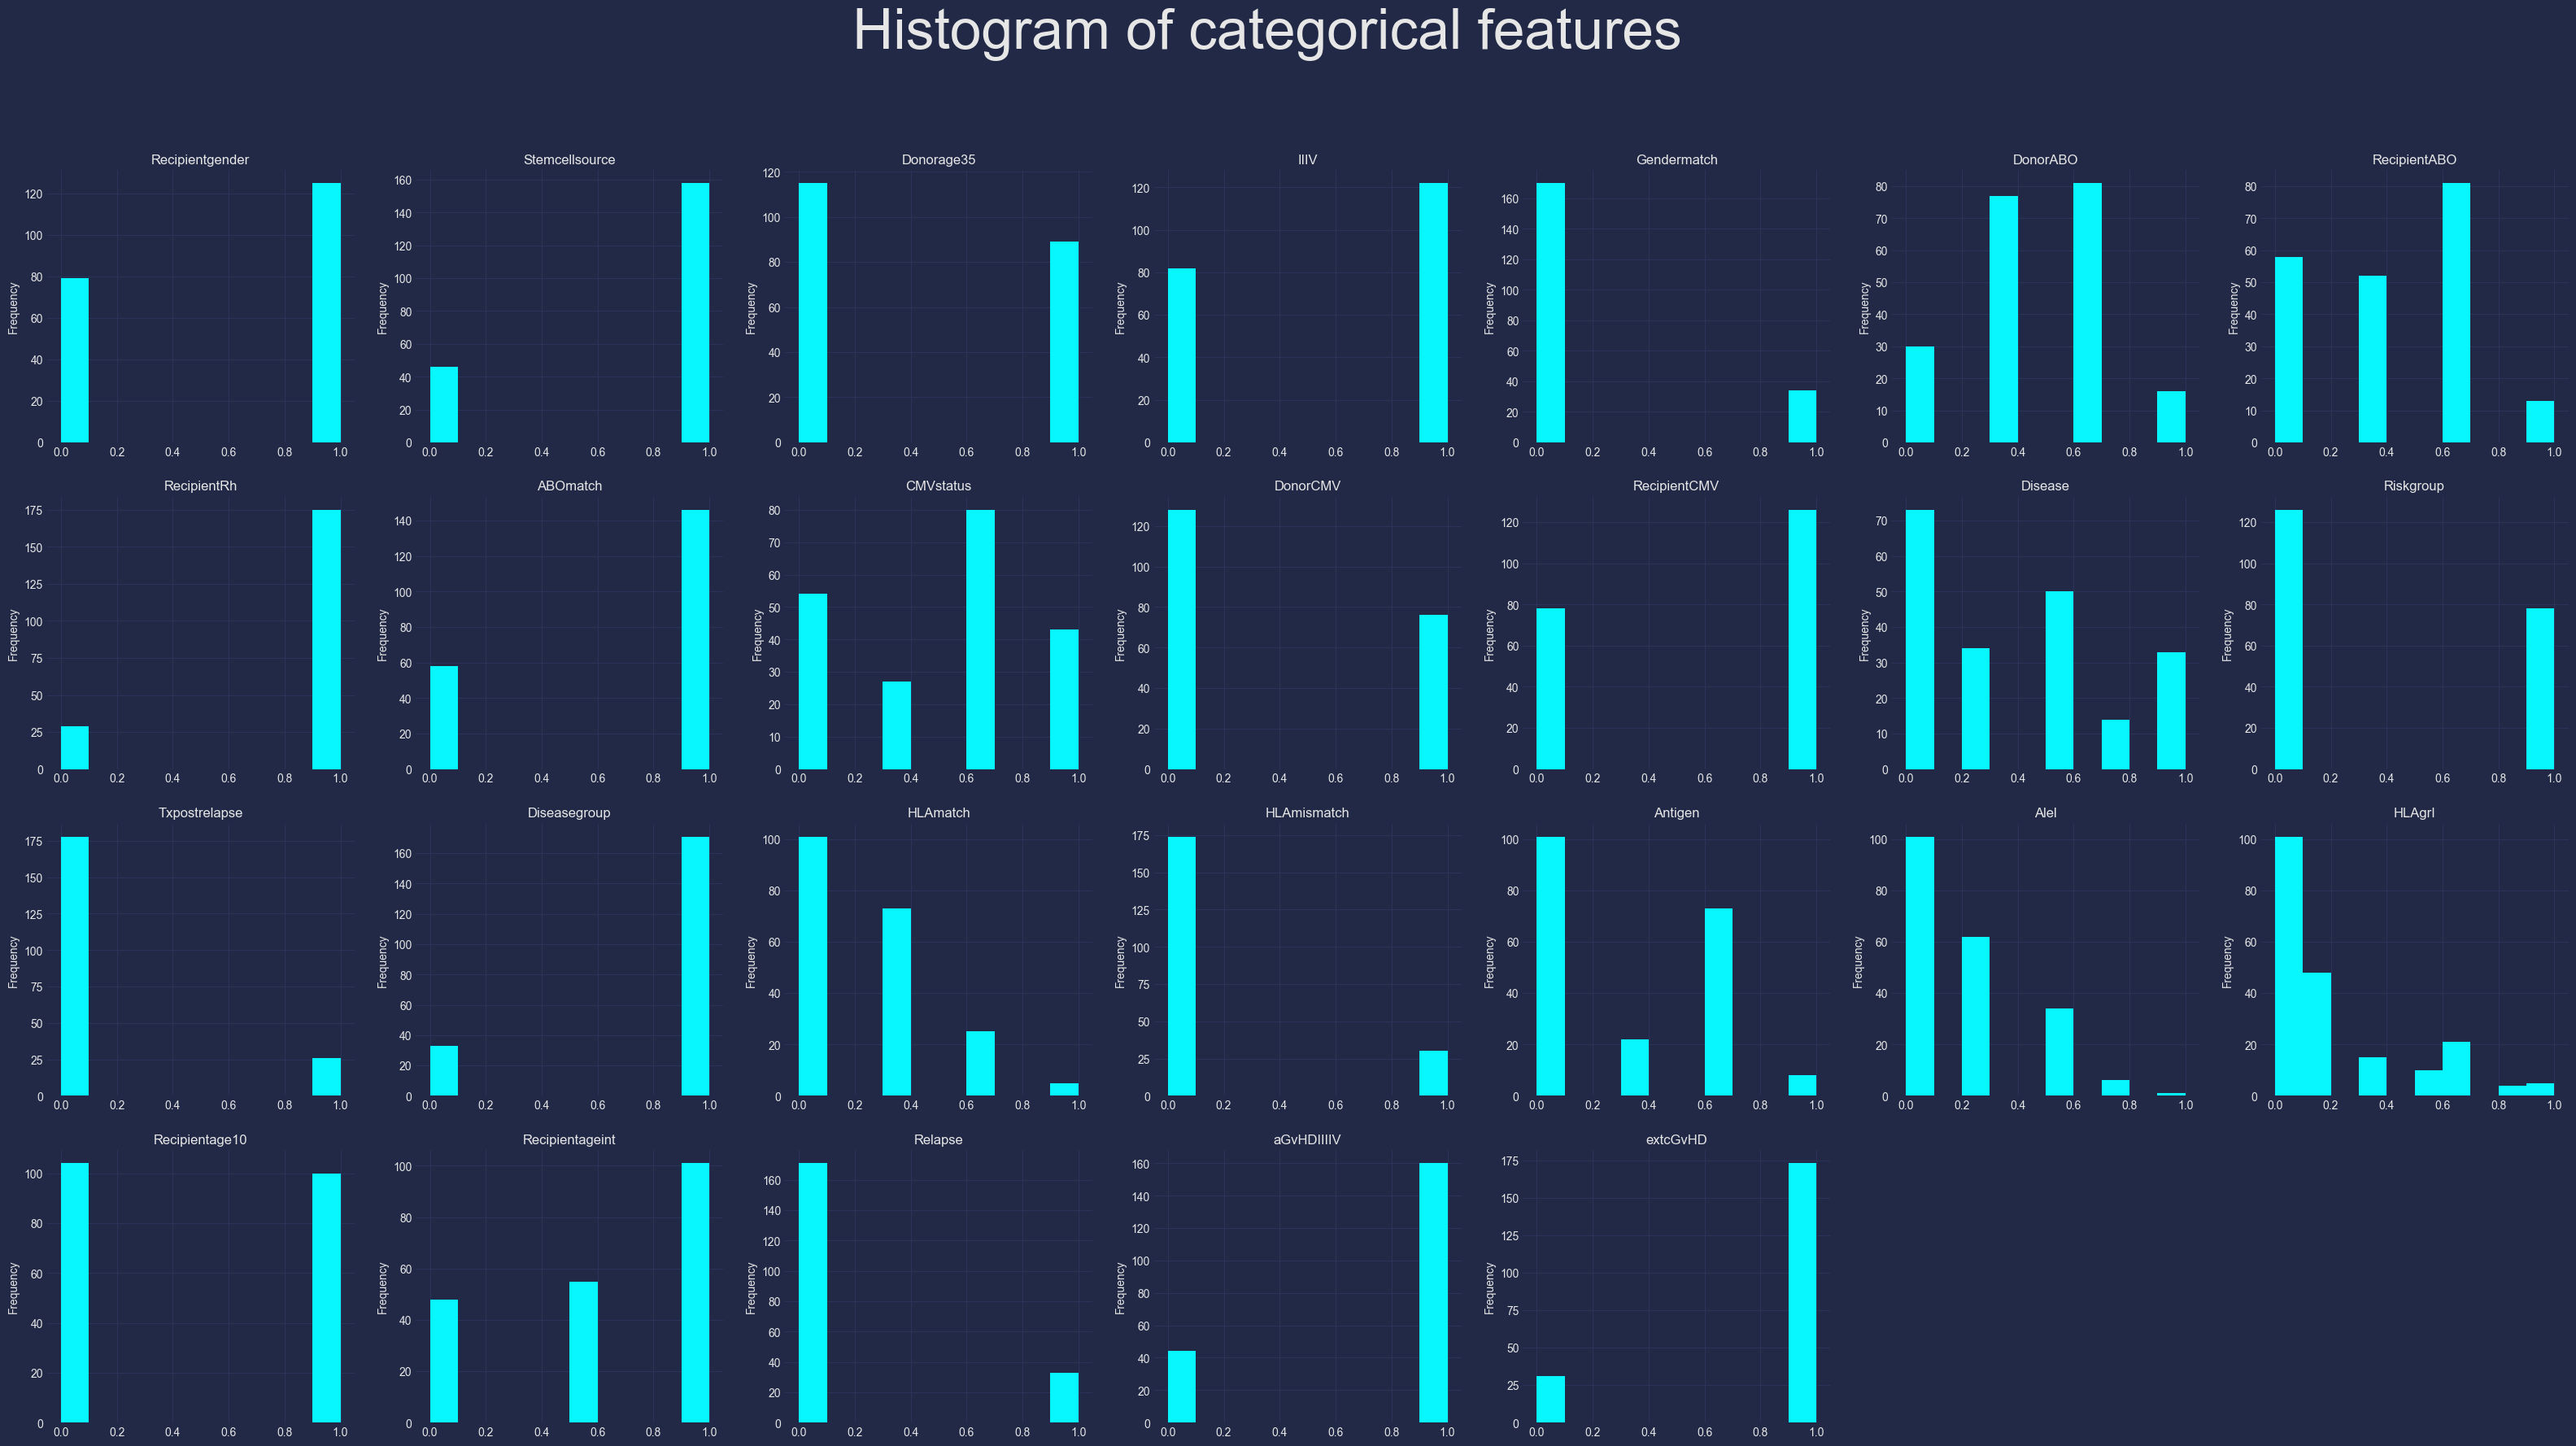

In [31]:
fig, ax = plt.subplots(4,7, figsize=(40,20), squeeze=True)
fig.delaxes(ax[3,6])
fig.delaxes(ax[3,5])
k = 0
for i in range(4):
    for j in range(7):
        if k >= 26:
            break
        else:
            balanced_df[categorical_features[k]]\
                .plot(kind = 'hist', ax = ax[i,j],title = categorical_features[k])
            k += 1
            mplcyberpunk.add_underglow(ax = ax[i,j])
fig.suptitle("Histogram of categorical features", fontsize = 50)

Text(0.5, 0.98, 'Pie charts of categorical features')

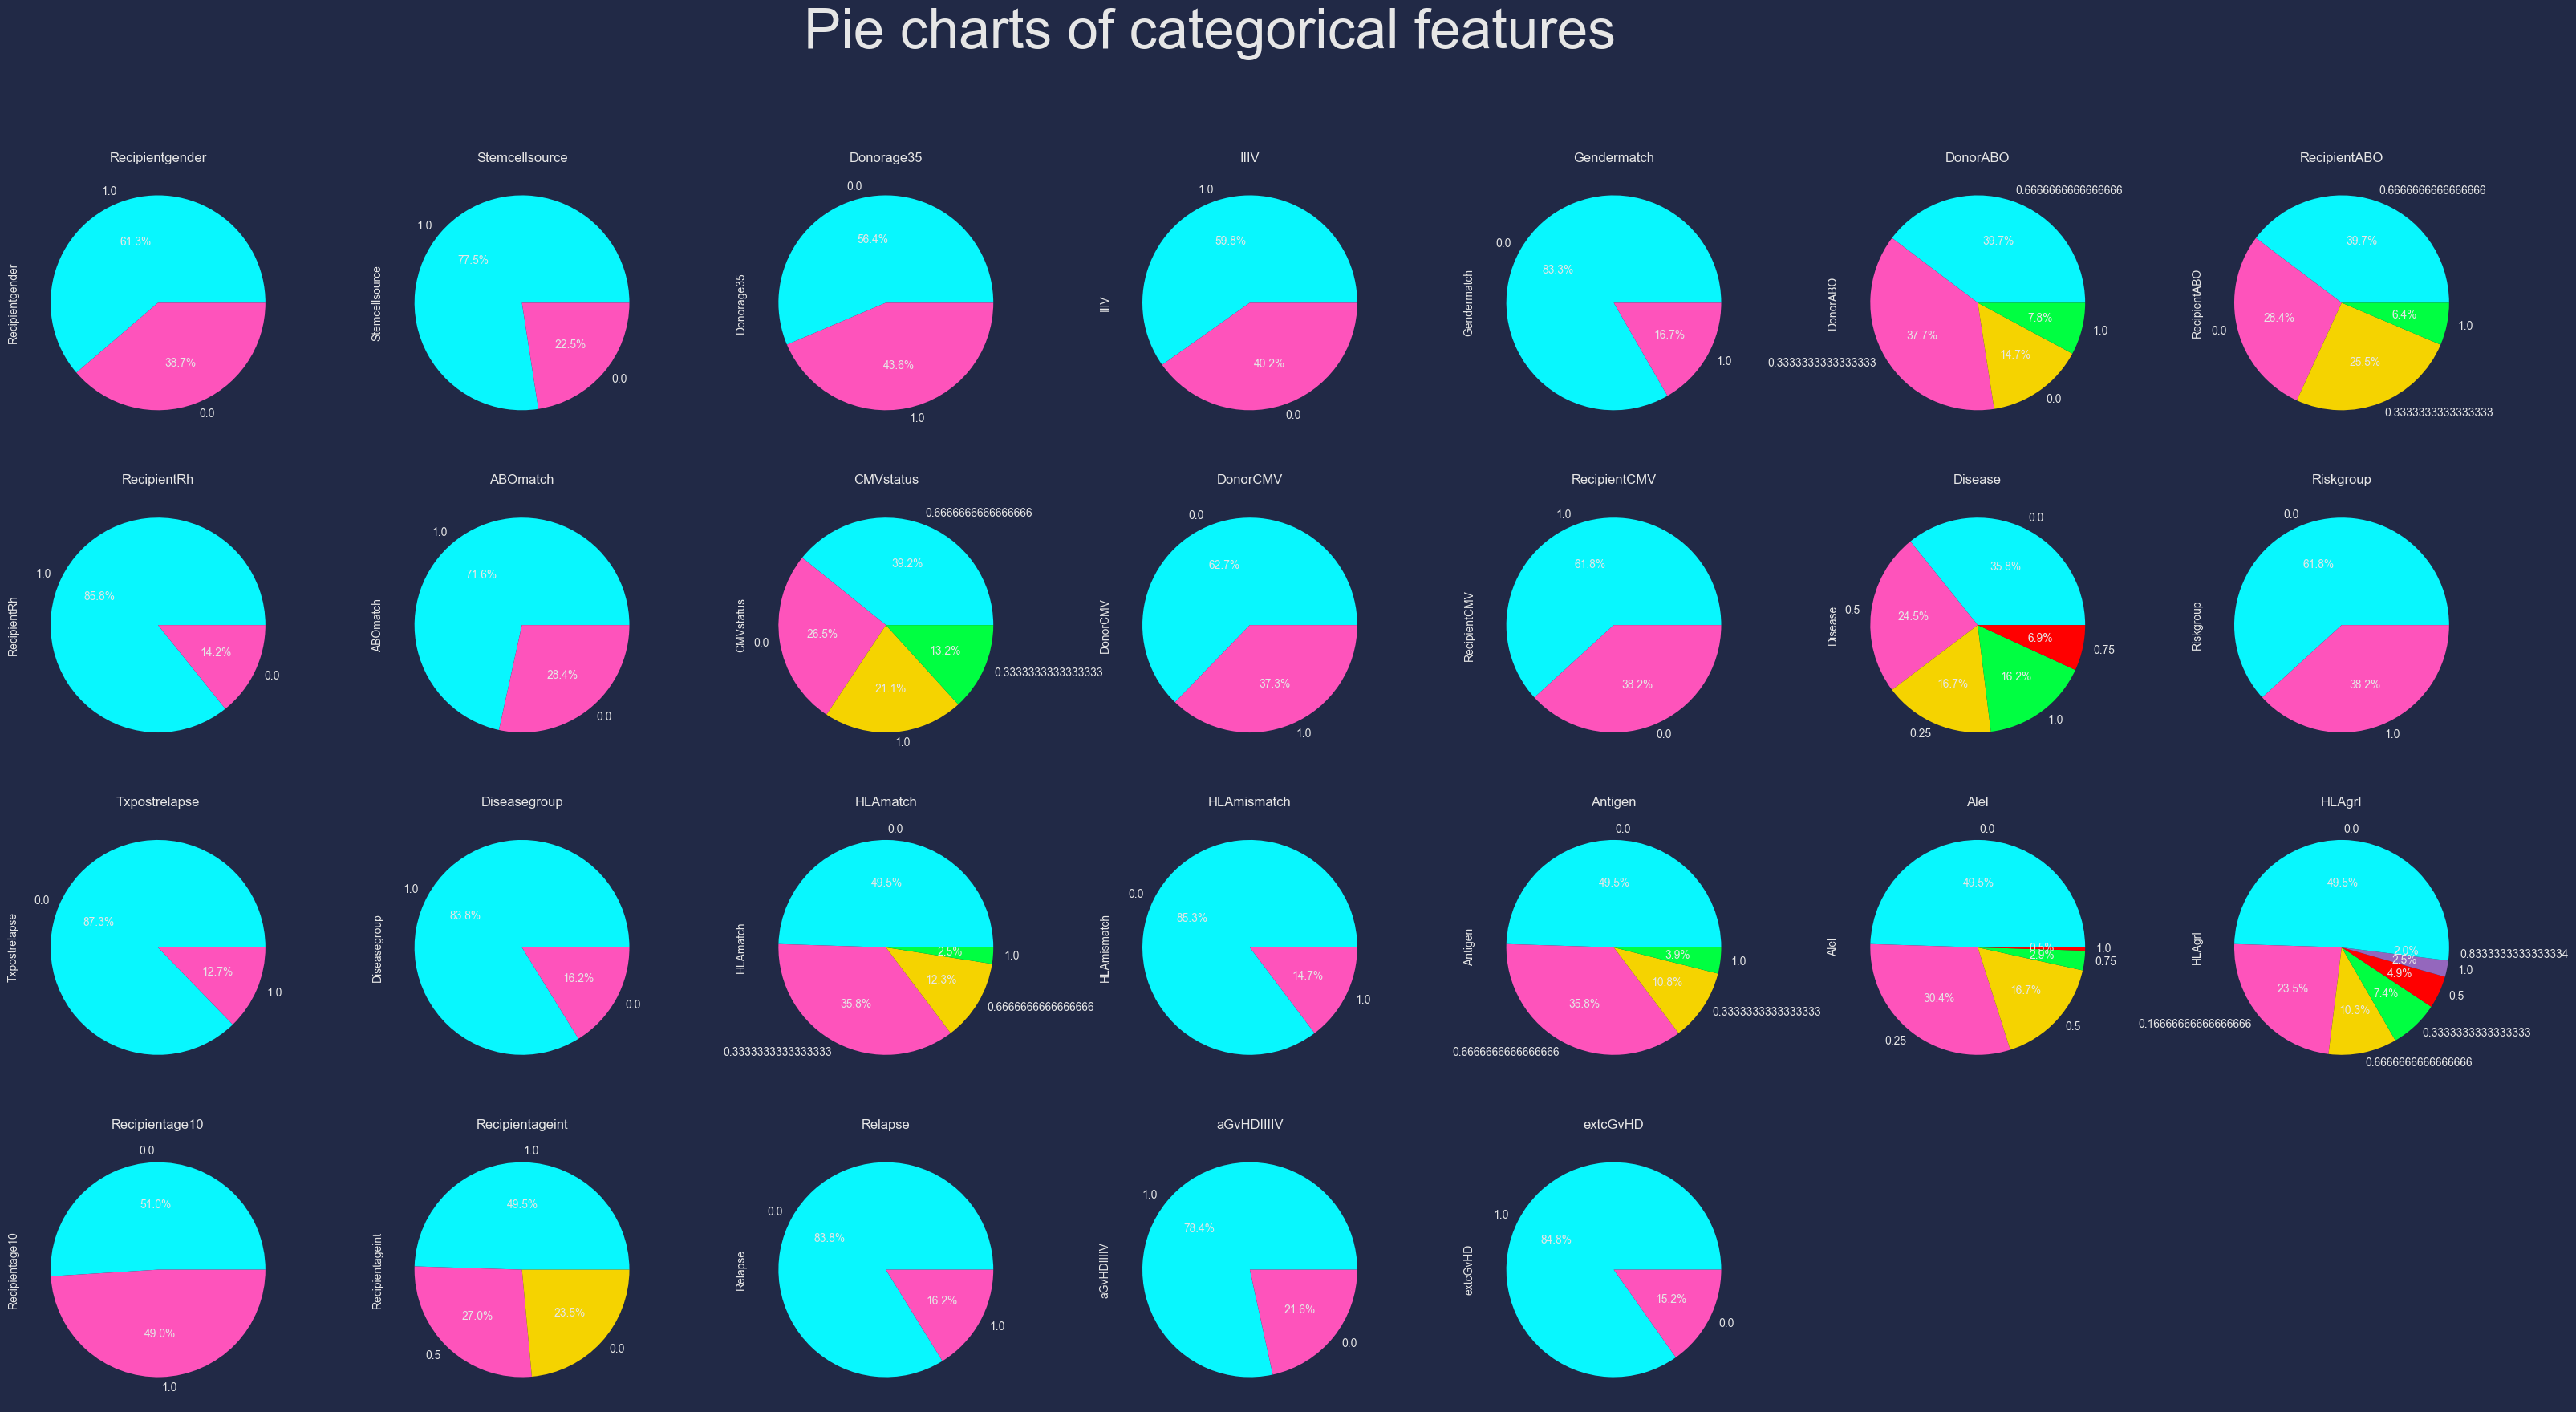

In [32]:
fig, ax = plt.subplots(4,7, figsize=(40,20), squeeze=True)
fig.delaxes(ax[3,6])
fig.delaxes(ax[3,5])
k = 0
for i in range(4):
    for j in range(7):
        if k >= 26:
            break
        else:
            balanced_df[categorical_features[k]].value_counts()\
                .plot(kind = 'pie', ax = ax[i,j],title = categorical_features[k]
                , autopct = "%1.1f%%")
            k += 1
            mplcyberpunk.add_gradient_fill(ax = ax[i,j])
fig.suptitle("Pie charts of categorical features", fontsize = 50)

Now we will try to see how the different attributes correlates with our target attribute which is "survival status". 

## Inferences from the categorical variables

- Majority of the donors are observed to be male
- Majority of the stem cells are taken from bone marrow rather than peripheral blood 
- Majority of the donors are less than 35 years of age 
- The most compatible gender match is found to be female to male
- Majority of the donors have blood type A
- Majority of the recipients have bool type B
- Majority of the donor and recipient blood type pair has matched  
- Majority of the diseases observed are non-malignant
- The risk group is high in majority
- 53% of the recipients are below the age of 10 years



In [33]:
def find_correlating_features_with_survival_status(df:pd.DataFrame, threshold:float):
    """
    This function takes a dataframe and a threshold as input and
    returns a dictionary with dataframe attributes as keys
    and correlation with the attribute 'attack' if the correlation
    is beyond the specified threshold
    
    """
    corr_dict = {}
    corr_matrix = df.corr(method = 'spearman')
    for i in range(len(corr_matrix.columns)):
        if (threshold > 0 or threshold == -1)and corr_matrix.iloc[i,36] > threshold:
            corr_dict[corr_matrix.columns[i]] = corr_matrix.iloc[i,36]
        elif threshold < 0 and corr_matrix.iloc[i,36] < threshold:
            corr_dict[corr_matrix.columns[i]] = corr_matrix.iloc[i,36]
    return corr_dict

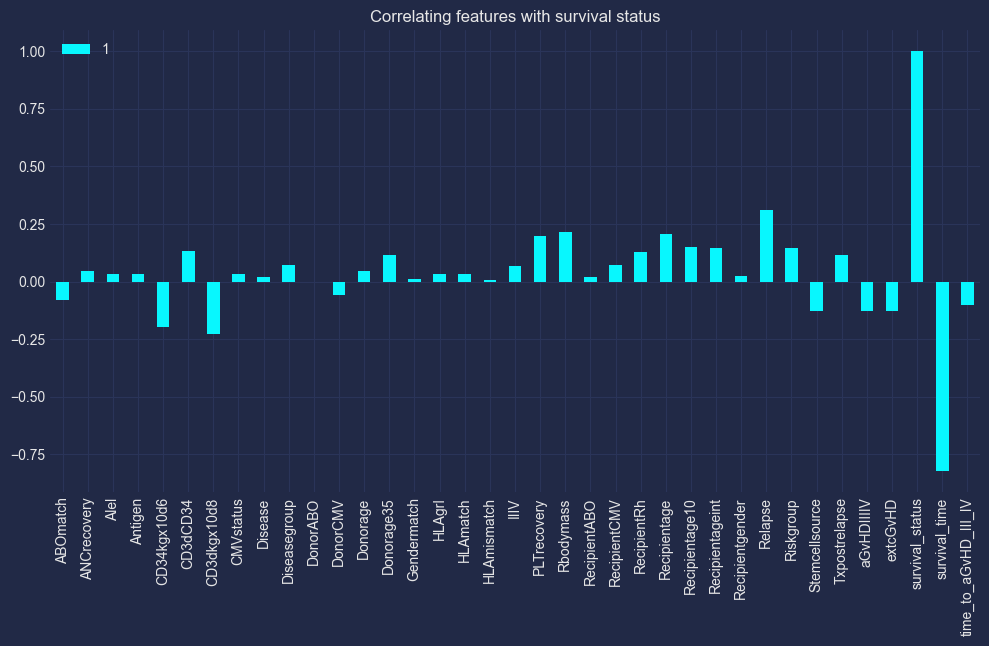

In [34]:
corr = find_correlating_features_with_survival_status(encoded_df, -1)
pd.DataFrame({'1':corr}).plot(kind = 'bar', figsize = (12,6), title="Correlating features with survival status")
mplcyberpunk.make_lines_glow()

Here we can observe that only the feature "survival time" has high negative correlation with the target attribute "survival status", suggesting the fact that higher the time required to observe a certain patient, lower is the chance of survival

Also the low correlations is an indicator that :
- we need to collect more data
- the relationships could be non linear

## Correlating Features

In this section we are interested in finding features which correlates with one another beyond a threshold so that we can perform feature engineering to create new attributes

In [35]:

def find_correlating_features(df:pd.DataFrame, threshold:float):
    """
    This function takes a dataframe and a threshold as input and
    returns a dictionary with dataframe attributes as keys
    and correlation with the attributes if the correlation
    is beyond the specified threshold
    
    """
    corr_dict = {}
    corr_matrix = df.corr(method = 'spearman')
    for i in range(len(corr_matrix.columns)):
        name = corr_matrix.columns[i]
        corr_dict[name] = []
        for j in range(len(corr_matrix.columns)):
            if corr_matrix.iloc[i,j]>abs(threshold) and (i!=j) and (i not in corr_dict):
                corr_dict[name].append((corr_matrix.columns[j], corr_matrix.iloc[i,j]))
    return corr_dict

In [36]:
corr_features_point7 = find_correlating_features(encoded_df,0.8)
for feature in corr_features_point7:
    if len(corr_features_point7[feature])>0:
        print()
        print(f"Correlating features of {feature} are :")
        for jfeature in corr_features_point7[feature]:
            print(f"{jfeature[0]} : {jfeature[1]:.2f}", end = ', ')


Correlating features of Donorage are :
Donorage35 : 0.86, 
Correlating features of Donorage35 are :
Donorage : 0.86, 
Correlating features of CMVstatus are :
RecipientCMV : 0.86, 
Correlating features of RecipientCMV are :
CMVstatus : 0.86, 
Correlating features of HLAmatch are :
Antigen : 0.94, Alel : 0.95, HLAgrI : 0.98, 
Correlating features of Antigen are :
HLAmatch : 0.94, Alel : 0.83, HLAgrI : 0.89, 
Correlating features of Alel are :
HLAmatch : 0.95, Antigen : 0.83, HLAgrI : 0.96, 
Correlating features of HLAgrI are :
HLAmatch : 0.98, Antigen : 0.89, Alel : 0.96, 
Correlating features of Recipientage are :
Recipientage10 : 0.86, Recipientageint : 0.93, Rbodymass : 0.92, 
Correlating features of Recipientage10 are :
Recipientage : 0.86, Recipientageint : 0.92, Rbodymass : 0.82, 
Correlating features of Recipientageint are :
Recipientage : 0.93, Recipientage10 : 0.92, Rbodymass : 0.88, 
Correlating features of aGvHDIIIIV are :
time_to_aGvHD_III_IV : 0.97, 
Correlating features of

## Hypothesis test


In [37]:
hypo_df = balanced_df[['CD34kgx10d6', 'survival_time']]
hypo_df.head()

,CD34kgx10d6,survival_time
51,0.288162,0.869798
60,0.353756,0.077586
186,0.171513,0.329667
73,0.063171,0.019620
79,0.202146,0.252378


**Null hypothesis : addition of cd34+ cells / kg doesn't increase survival time \
Alternate Hypothesis : addition of cd34+ cells / kg increase survival time**

so the alternate hypothesis demands us to prove a positive correlation of cd34+ cells with survival time \
\
whereas, the null hypothesis states that the correlation is less than or equal to 0

Other way of saying this would be, if we assume there is no positive correlation between cd34 and survival time, we can assume that if we were to sample from the dataset some n number of times, the correlation we will get will be distributed between -0 to 1

and if we sample from that distribution some n number of times, by the idea of central limit theorem, we can safely assume that the sample distribution of the sampling mean of the correlations would be distributed approximately normally

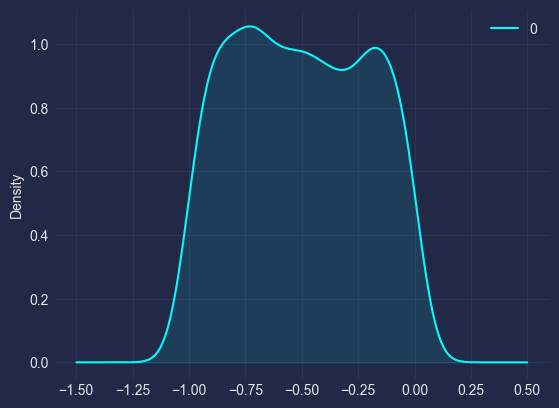

In [38]:
## lets generate some random numbers from -1 to 0 and try to visualize it
null_corr = []
for i in range(1000):
    c = np.random.rand()*-1
    null_corr.append(c)
null_corr = pd.DataFrame(null_corr)
null_corr.plot(kind = 'density')
mplcyberpunk.add_underglow()

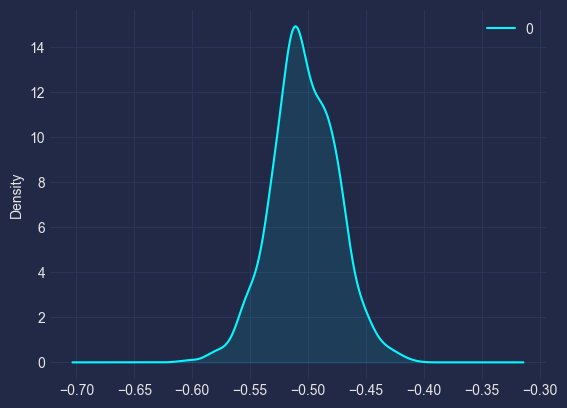

In [39]:
## let's sample from this distribution 1000 times with a sample size of 100
sampled_null_corr_means = []
for i in range(1000):
    temp = null_corr.sample(100).mean()
    sampled_null_corr_means.append(temp)
sampled_null_corr_means = pd.DataFrame(sampled_null_corr_means)
sampled_null_corr_means.plot(kind = 'density')
mplcyberpunk.add_underglow()

In [40]:
sampled_corr_df = []
for i in range(1000):
    temp = hypo_df.sample(10).corr(method = 'spearman').iloc[0][1]
    sampled_corr_df.append(temp)
mean_observed_corr = np.average(sampled_corr_df)

print(f"The mean observed correlation in the dataset is {mean_observed_corr}")

The mean observed correlation in the dataset is 0.18042204018519073


In [41]:
"""
Now we have the following things :
mean of the sample distribution of the sample mean of random correlations
mean of the observed correlation 
assuming the sampling distribution is normal, let's perform a hypothesis test
"""
mean = sampled_null_corr_means.mean().values[0]
x_bar = mean_observed_corr
sample_size = 100
standard_dev = sampled_null_corr_means.std().values[0]
significance = 0.05

In [42]:
sampled_null_corr_means.std().values[0]/10

0.002812033670666638

In [43]:
print(f"μ = {mean}, x_bar = {x_bar}, n = {sample_size}, sigma = {standard_dev}, alpha = {significance}")
print(f"\nHypothesis formulations :\nμ <= {mean}\nμ > {mean}")


μ = -0.5032811063723551, x_bar = 0.18042204018519073, n = 100, sigma = 0.02812033670666638, alpha = 0.05

Hypothesis formulations :
μ <= -0.5032811063723551
μ > -0.5032811063723551


In [44]:
import scipy.stats as stat
z_critical = abs(stat.norm.ppf(significance))
z = (x_bar - mean)/(standard_dev / np.sqrt(sample_size))
if z <= z_critical:
    print(f"{z} < {z_critical}\nSo, we fail to reject the null hypothesis")
else:
    print(f"z : {z} > z_critical : {z_critical}\nSo, we reject null hypothesis")

z : 243.13476530864688 > z_critical : 1.6448536269514729
So, we reject null hypothesis


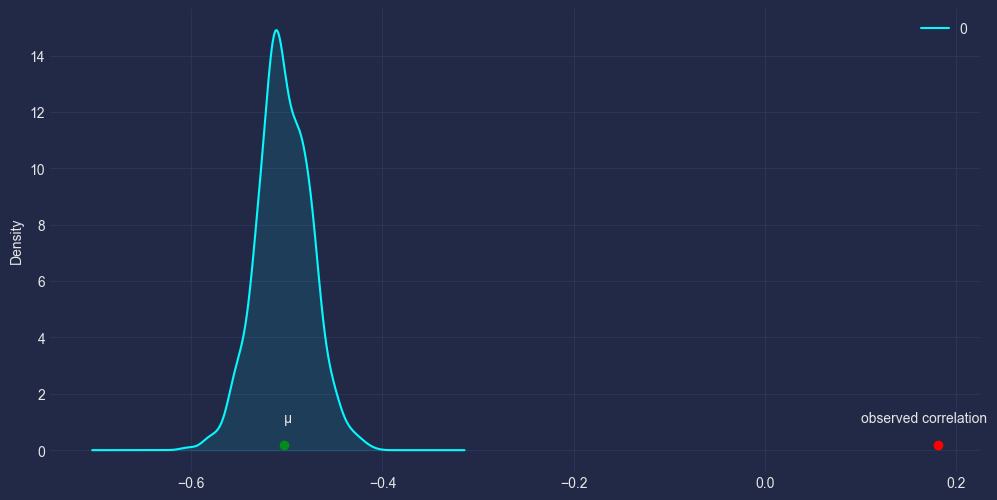

In [45]:
sampled_null_corr_means.plot(kind = 'density', figsize=(12,6))
plt.scatter(x_bar, 0.2, color = 'red')
plt.scatter(mean, 0.2, color = 'green')

plt.text(mean, 1, "μ")
plt.text(x_bar-0.08, 1, "observed correlation")
mplcyberpunk.add_underglow()

#### So, the results prove the fact that cd34+ cells/kg in fact has a positive correlation with the "survival time" and so, we can conclude the fact that addition of cd34+ cells will have positive impact on survival time of the patients

## Classifier built using Machine Learning 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(balanced_df.iloc[:,0:36], balanced_df['survival_status'], shuffle=True)

#### Sample Model

In [47]:
from sklearn import metrics
class MLModel:
    def __init__(self, model):
        self.model = model
        self.model.fit(X_train, y_train)
    def get_predictions(self):
        return self.model.predict(X_test)
    def view_scores(self):
        preds = self.get_predictions()
        print(f"Accuracy : {metrics.accuracy_score(y_test, preds)}")
        print(f"F1 score : {metrics.f1_score(y_test, preds)}")
        print(f"Precision : {metrics.precision_score(y_test, preds)}")
        print(f"Recall : {metrics.recall_score(y_test, preds)}")
    def plot_auc_roc_curve(self):
        y_pred_proba = self.model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        mplcyberpunk.add_glow_effects()
        plt.show()
    def get_confusion_matrix(self):
        print(metrics.confusion_matrix(y_test, self.get_predictions()))
        print(metrics.classification_report(y_test, self.get_predictions()))

## Logistic Regression

Accuracy : 0.8431372549019608
F1 score : 0.8333333333333334
Precision : 0.8333333333333334
Recall : 0.8333333333333334


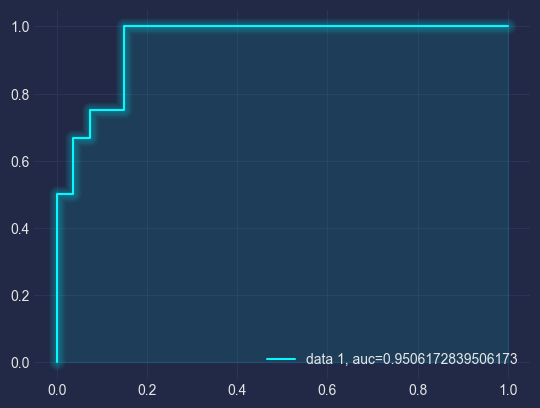

In [48]:
from sklearn.linear_model import LogisticRegression
lr = MLModel(LogisticRegression())
lr.get_predictions()
lr.view_scores()
lr.plot_auc_roc_curve()


In [49]:
lr.get_confusion_matrix()

[[23  4]
 [ 4 20]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        27
         1.0       0.83      0.83      0.83        24

    accuracy                           0.84        51
   macro avg       0.84      0.84      0.84        51
weighted avg       0.84      0.84      0.84        51



## Decision Tree

Accuracy : 0.9411764705882353
F1 score : 0.9387755102040817
Precision : 0.92
Recall : 0.9583333333333334


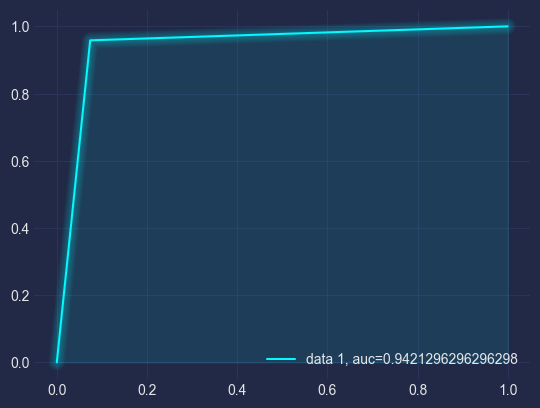

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = MLModel(DecisionTreeClassifier())
dt.get_predictions()
dt.view_scores()
dt.plot_auc_roc_curve()

In [51]:
dt.get_confusion_matrix()

[[25  2]
 [ 1 23]]
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94        27
         1.0       0.92      0.96      0.94        24

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



## Random Forest

Accuracy : 0.9607843137254902
F1 score : 0.9600000000000001
Precision : 0.9230769230769231
Recall : 1.0


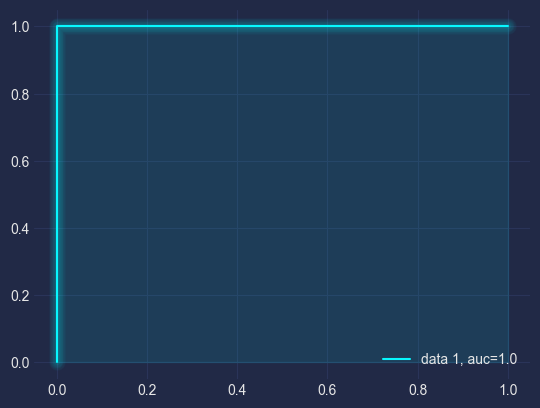

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = MLModel(RandomForestClassifier())
rfc.get_predictions()
rfc.view_scores()
rfc.plot_auc_roc_curve()

In [53]:
rfc.get_confusion_matrix()

[[25  2]
 [ 0 24]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        27
         1.0       0.92      1.00      0.96        24

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



## SVM

Accuracy : 0.7450980392156863
F1 score : 0.7111111111111111
Precision : 0.7619047619047619
Recall : 0.6666666666666666


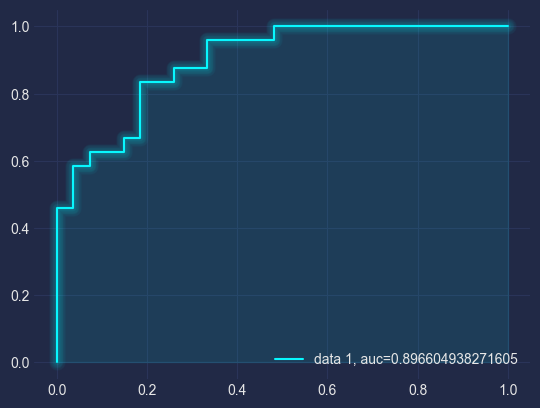

In [54]:
from sklearn.svm import SVC
svc = MLModel(SVC(probability=True))
svc.get_predictions()
svc.view_scores()
svc.plot_auc_roc_curve()

In [55]:
svc.get_confusion_matrix()

[[22  5]
 [ 8 16]]
              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77        27
         1.0       0.76      0.67      0.71        24

    accuracy                           0.75        51
   macro avg       0.75      0.74      0.74        51
weighted avg       0.75      0.75      0.74        51



Accuracy : 0.5294117647058824
F1 score : 0.07692307692307693
Precision : 0.5
Recall : 0.041666666666666664


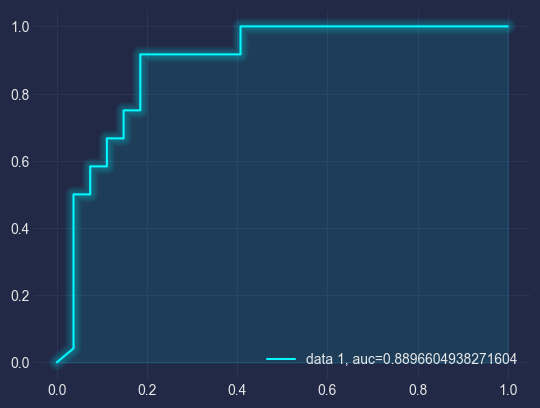

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = MLModel(GaussianNB())
nb.get_predictions()
nb.view_scores()
nb.plot_auc_roc_curve()

In [57]:
nb.get_confusion_matrix()

[[26  1]
 [23  1]]
              precision    recall  f1-score   support

         0.0       0.53      0.96      0.68        27
         1.0       0.50      0.04      0.08        24

    accuracy                           0.53        51
   macro avg       0.52      0.50      0.38        51
weighted avg       0.52      0.53      0.40        51



## Hypothesis Tests
These hypothesis tests are performed in addition to the proposed test

First we will use a decision tree classifier to generate rules and test them to check their validity

In [58]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)

In [59]:
from sklearn.tree import export_text
print(export_text(dtc, feature_names = list(balanced_df.iloc[:,0:36].columns) ))

|--- survival_time <= 0.13
|   |--- class: 1.0
|--- survival_time >  0.13
|   |--- Relapse <= 0.50
|   |   |--- Donorage <= 0.83
|   |   |   |--- Rbodymass <= 0.70
|   |   |   |   |--- survival_time <= 0.22
|   |   |   |   |   |--- Riskgroup <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Riskgroup >  0.50
|   |   |   |   |   |   |--- DonorABO <= 0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- DonorABO >  0.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- survival_time >  0.22
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Rbodymass >  0.70
|   |   |   |   |--- class: 1.0
|   |   |--- Donorage >  0.83
|   |   |   |--- CD3dkgx10d8 <= 0.48
|   |   |   |   |--- class: 1.0
|   |   |   |--- CD3dkgx10d8 >  0.48
|   |   |   |   |--- class: 0.0
|   |--- Relapse >  0.50
|   |   |--- HLAmismatch <= 0.50
|   |   |   |--- CD3dkgx10d8 <= 0.33
|   |   |   |   |--- class: 1.0
|   |   |   |--- CD3dkgx10d8 >  0.33
|   |   |

Text(0.5, 1.0, 'Decision tree rules')

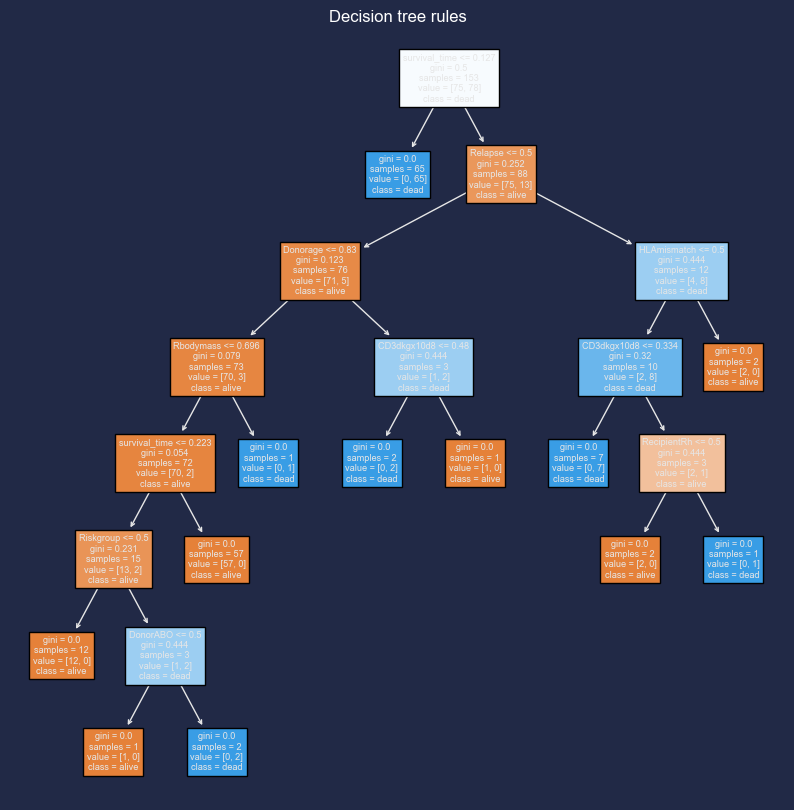

In [60]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtc, feature_names=list(balanced_df.iloc[:,0:36].columns), class_names=["alive", "dead"], filled = True);
plt.title("Decision tree rules", color = 'white')

## Test 1

It is pointed out from the decision tree rules that a patient doesn't survive if the survival time <= 0.13. Let's use hypothesis test to check the validity of the rule

In [61]:
# First we select all the patients who failed to survive, survival_status = 1 indicates the patient died
test1_df = balanced_df[['survival_time', 'survival_status']].where(balanced_df['survival_status']==1).dropna()
test1_df.head()

,survival_time,survival_status
60,0.077586,1.0
73,0.019620,1.0
79,0.252378,1.0
82,0.017836,1.0
81,0.007729,1.0


In [62]:
observed_mean_survival_time = test1_df['survival_time'].mean()
print("Mean survival time of the observed patients", observed_mean_survival_time)

Mean survival time of the observed patients 0.071600102585624


Text(0.05992013971462545, 2, 'mean survival time \nfor dead patients')

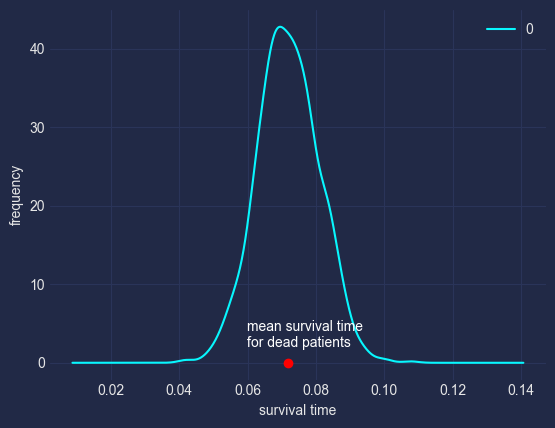

In [63]:
# let' sample from the data set
mean_survival_times = []
for i in range(1000):
    temp_mean = test1_df.sample(n=40, replace=False)['survival_time'].mean()
    mean_survival_times.append(temp_mean)
pd.DataFrame(mean_survival_times).plot(kind = 'density')
plt.xlabel('survival time')
plt.ylabel('frequency')
plt.scatter(np.array(mean_survival_times).mean(), 0, c = 'red')
plt.text(s = "mean survival time \nfor dead patients",x=np.array(mean_survival_times).mean()-0.012, y=2, c = 'white')

ho : mean time >= 0.13
ha : mean time < 0.13

observed mean time = 0.07

let's assume that there's a hypothetical normal distribution centered around mu = 0.13 representing all the survial time of dead patients

Text(0.05992013971462545, 2, 'observed mean survival time \nfor dead patients')

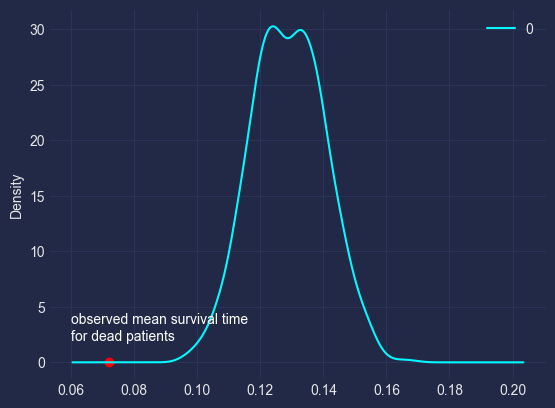

In [64]:
std_dev = test1_df['survival_time'].std()/np.sqrt(40)
pd.DataFrame(np.random.normal(0.13, std_dev, 1000)).plot(kind = 'density')
plt.scatter(np.array(mean_survival_times).mean(), 0, c = 'red')
plt.text(s = "observed mean survival time \nfor dead patients",x=np.array(mean_survival_times).mean()-0.012, y=2, c = 'white')

In [75]:
z

-4.947293734267073

In [65]:
alpha = 0.05
z = (observed_mean_survival_time - 0.13)/std_dev
z_critical = stat.norm.ppf(alpha)

In [66]:
if abs(z)<abs(z_critical):
    print("z < z_critical")
    print("Fail to reject null hypothesis")
else:
    print("z > z_critical")
    print("Rejected null hypothesis")

z > z_critical
Rejected null hypothesis


Hence we conclude that the survival time of the dead patients is less than 0.13
To visually see where does 0.13 lies in the actual data, we can refer to the below plot

Text(0.11800000000000001, 2, 'survival time = 0.13')

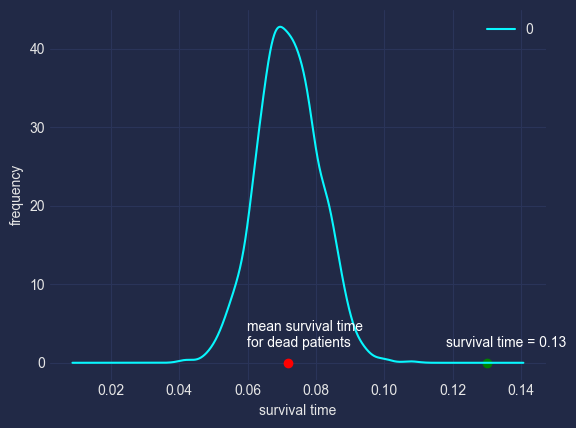

In [67]:
pd.DataFrame(mean_survival_times).plot(kind = 'density')
plt.xlabel('survival time')
plt.ylabel('frequency')
plt.scatter(np.array(mean_survival_times).mean(), 0, c = 'red')
plt.text(s = "mean survival time \nfor dead patients",x=np.array(mean_survival_times).mean()-0.012, y=2, c = 'white')
plt.scatter(0.13, 0, c = 'green')
plt.text(s = "survival time = 0.13",x=0.13-0.012, y=2, c = 'white')

## Test 2
It has been inferred by the decision tree that a patient is alive if CD3dkgx10d8 < = 0.45

In [68]:
test2 = balanced_df[['CD3dkgx10d8', 'survival_status']].where(balanced_df['survival_status']==0).dropna()
mean_val = test2['CD3dkgx10d8'].mean()

Text(0.5, 1.0, 'Sampling distribution of the CD3dkgx10d8 sample means')

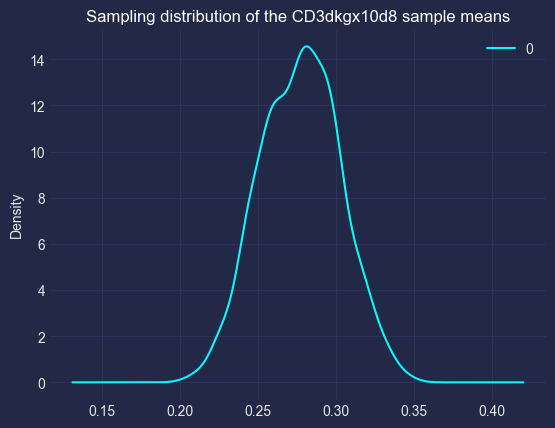

In [69]:
CD3dkgx10d8_mean_vals = []
for i in range(1000):
    temp_mean = test2.sample(n=40, replace=False)['CD3dkgx10d8'].mean()
    CD3dkgx10d8_mean_vals.append(temp_mean)
pd.DataFrame(CD3dkgx10d8_mean_vals).plot(kind = 'density')
plt.title("Sampling distribution of the CD3dkgx10d8 sample means", c = 'white')

Hypothesis : 
Ho : CD3dkgx10d8 >= 0.45
Ha : CD3dkgx10d8 < 0.45

Text(0.23714024725274727, 1, 'observed CD3dkgx10d8 val\nfor patients who survived')

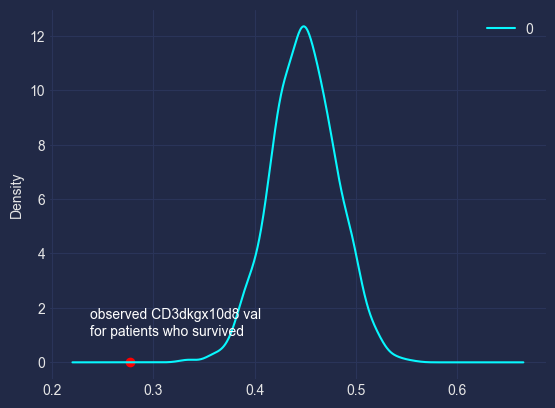

In [70]:
CD3dkgx10d8_observed_mean = np.array(CD3dkgx10d8_mean_vals).mean()
std_dev2 = test2['CD3dkgx10d8'].std()/np.sqrt(40)

pd.DataFrame(np.random.normal(0.45, std_dev2, 1000)).plot(kind = 'density')
plt.scatter(CD3dkgx10d8_observed_mean, 0, c = 'red')
plt.text(s="observed CD3dkgx10d8 val\nfor patients who survived", x = CD3dkgx10d8_observed_mean-0.04, y=1, c = 'white')

In [71]:
alpha = 0.05
z2 = (CD3dkgx10d8_observed_mean - 0.45)/std_dev2
z_critical2 = stat.norm.ppf(alpha)

In [72]:
if abs(z2)<abs(z_critical2):
    print("z2 < z_critical2")
    print("Fail to reject null hypothesis")
else:
    print("z2 > z_critical2")
    print("Rejected null hypothesis")

z2 > z_critical2
Rejected null hypothesis


Hence we can conclude that patients who survived has CD3dkgx10d8 val < 0.45

For visualisation we can refer to the plot  below

Text(0.41000000000000003, 1, 'CD3dkgx10d8 val = 0.45')

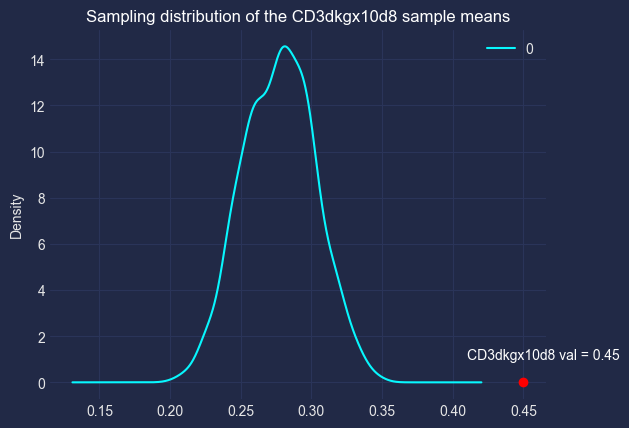

In [73]:
pd.DataFrame(CD3dkgx10d8_mean_vals).plot(kind = 'density')
plt.title("Sampling distribution of the CD3dkgx10d8 sample means", c = 'white')
plt.scatter(0.45, 0, c = 'red')
plt.text(s="CD3dkgx10d8 val = 0.45", x = 0.45-0.04, y=1, c = 'white')